Part 1 : SVM, 선형과 비선형 kernel

Part 2 : Decision Tree

**[지도 학습 알고리즘]**

**SVM** 이란? 

SVM 은 *Support Vector Machine* 의 약자로, '주어진 데이터에 대한 분류' 주로 작업을 수행할 때 사용한다. 

분류되지 않은 데이터를 어떤 경계(결정 경계)를 기준으로 분류할 때, 분류된 데이터들에서 결정 경계와 가장 가까운 데이터들을 서포트 벡터(*Support Vector*)라 부르며 결정 경계를 기준으로 분류된 두 서포트 벡터간의 길이를 마진(*Margin*)이라 한다. SVM 그래프 상 패턴에서 벗어난 값을 이상치라 하며 이상치를 비허용하게되면 *Hard Margin*, 허용하게 되면 *Soft Margin* 이라 부른다. 

In [ ]:
# 딥러닝 파이토치 교과서 내용 따라해보기
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
#from sklearn import * 해줘도 됨
import tensorflow as tf
import os

os.environ['TF_CPP_MIN_LOG_LEVEL']='3' # 0, 1, 2, 3

iris=datasets.load_iris() # 사이킷런에서 제공하는 iris 데이터 호출
# 훈련과 테스트 데이터셋으로 데이터를 분류
X_train, X_test, y_train, y_test=model_selection.train_test_split(iris.data, 
                                iris.target, test_size=0.6, random_state=42)

svm=svm.SVC(kernel='linear', C=1.0, gamma=0.5)
svm.fit(X_train, y_train) # SVM 분류기를 훈련
predictions=svm.predict(X_test) # 훈련된 모델로 테스트 데이터 예측
score=metrics.accuracy_score(y_test, predictions)
print('정확도 : {0:f}'.format(score))

정확도 : 0.988889


[**선형 kernel 예제**] Breast cancer dataset

In [3]:
from sklearn import datasets
from sklearn.model_selection import *
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics

# Scikit - breast cancer 로드
cancer= datasets.load_breast_cancer()

# 데이터셋 분리
X_train, X_test, y_train, y_test=train_test_split(
    cancer.data ,cancer.target ,
    test_size=0.3, random_state=109 )

# linear : 선형 분리
clf= svm.SVC(kernel='linear',random_state=100).fit(
    X_train, y_train)
clf.fit(X_train, y_train)
y_pred =clf.predict(X_test)
#print(y_pred))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("PRECISION:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.9649122807017544
PRECISION: 0.9811320754716981
Recall: 0.9629629629629629


[**비선형 kernel 예제**] make_moon dataset


In [8]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=400, noise=0.1, random_state=0)
#plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=2)
#plt.xlabel("$X_1$")
#plt.ylabel("$X_2$")
#plt.show()

x_train, x_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=100, test_size=0.3)
svm_clf =svm.SVC(kernel = 'rbf')
scores = cross_val_score(svm_clf, X, y, cv = 5)
scores
pd.DataFrame(cross_validate(svm_clf, X, y, cv =5))
print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.9925


[**Decision Tree 예제**] Breast cancer dataset

In [56]:
import numpy as np

from sklearn import tree
from sklearn import datasets
import sklearn.model_selection as ms
import sklearn.metrics as mt

data = datasets.load_breast_cancer()

X_train, X_test, y_train, y_test = ms.train_test_split(data.data, data.target, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

dtc = tree.DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train)

y_pred=dtc.predict(X_test)

max_depths = np.array([1, 2, 3, 5, 7, 9, 11])
train_score = []
test_score = []
for d in max_depths:
    dtc = tree.DecisionTreeClassifier(max_depth=d, random_state=42)
    dtc.fit(X_train, y_train)
    train_score.append(dtc.score(X_train, y_train))
    test_score.append(dtc.score(X_test, y_test))

#print('Train_Accuracy: ', dt_clf.score(X_train, y_train),'\n')

accuracy = mt.accuracy_score(y_test, y_pred) 
recall = mt.recall_score(y_test, y_pred) 
precision = mt.precision_score(y_test, y_pred) 
f1_score = mt.f1_score(y_test, y_pred) 
matrix = mt.confusion_matrix(y_test, y_pred) 

print('Accuracy: ', format(accuracy,'.2f'),'\n') 
print('Recall: ', format(recall,'.2f'),'\n') 
print('Precision: ', format(precision,'.2f'),'\n') 
print('F1_score: ', format(f1_score,'.2f'),'\n') 
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.95 

Recall:  0.96 

Precision:  0.96 

F1_score:  0.96 

Confusion Matrix: 
 [[40  3]
 [ 3 68]]


https://www.kaggle.com/code/rishidamarla/svm-tutorial-with-diabetes-dataset

In [ ]:
# Kaggle 에서 따온 데이터셋으로 SVM 이해하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm

df = pd.read_csv('/content/diabetes.csv') 
df.head();df.describe() # 데이터의 정보 출력

# 찾을 수 없는 값이나 예외가 있는지
df.isnull().values.any()

# 데이터셋의 가공 : Feature Engineering
zero_not_allowed = ["Glucose","BloodPressure","SkinThickness"]
for column in zero_not_allowed:
    df[column] = df[column].replace(0, np.NaN)
    mean = int(df[column].mean(skipna = True))
    df[column] = df[column].replace(np.NaN, mean)

# 훈련 데이터셋과 테스트 데이터셋 분류
x = df.iloc[:, :-2]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, 
                 y, random_state = 0, test_size = 0.2)

# SVM 모델 생성
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

# 혼동 행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

Accuracy: 0.7922077922077922


array([[98,  9],
       [23, 24]])

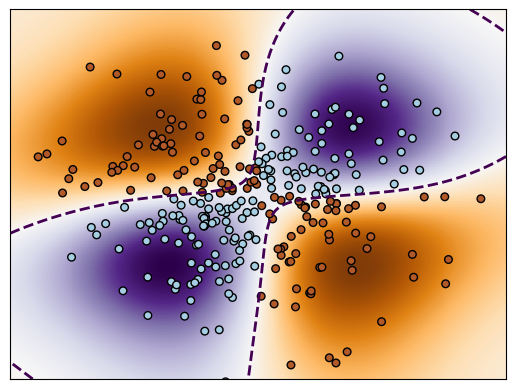

In [ ]:
# 비선형 kernel SVM
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC(gamma="auto")
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

**결정 트리**란?

이상치가 많은 데이터셋을 다룰 때 주로 사용하는 의사 결정의 한 방법으로 시각적 표현이 가능하기 때문에 이해가 편하다는 장점이 있다. 

데이터를 1차로 분류한 뒤 각 영역의 순도와 불순도에 대한 조정을 해 가며 학습(+결정)을 진행한다. 이 때 순도는 유의미한 값들의 모임 정도이고 불순도는 유의미한 값들의 모임 가운데 무의미한 또는 관련없는 값들의 정도를 뜻한다.

In [ ]:
# 딥러닝 파이토치 교과서 내용 따라해보기
import pandas as pd
df=pd.read_csv('/content/Main.csv')
df.head()

# 데이터셋의 가공 : Feature Engineering

# 생존 여부 예측 위해 설정
df=df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Survived']] 

# male 은 0, female 은 1 로 표시
df['Sex']=df['Sex'].map({'male':0, 'female':1}) 
df=df.dropna() # 무의미한 데이터 삭제
X=df.drop('Survived', axis=1) # 자료 
y=df['Survived'] # 2urvived 값을 예측 label 로 

# 훈련과 테스트 데이터셋으로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, 
                                  y, random_state=1)

# 결정 트리 라이브러리를 이용해 모델을 생성
from sklearn import tree
model=tree.DecisionTreeClassifier()

# 모델 훈련
model.fit(X_train, y_train)

# 모델 예측
y_predict=model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_predict),
             columns=['Predicted Not Survival', 'Predicted Survival'],
             index=['True Not Survival', 'True Survival'])

,Predicted Not Survival,Predicted Survival
True Not Survival,98,14
True Survival,17,50
